# Myopia Clusters Study
Can the patients in the provided dataset be clustered into myopia categories? If so, into how many clusters?

In [13]:
# Dependencies
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

## Part 1: Prepare the Data

In [15]:
# Import the data
data = pd.read_csv('Resources/myopia.csv')
data.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
# Remove the "MYOPIC" column from the dataset
X = data.drop("MYOPIC", axis=1)
X.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [10]:
# Standardize  dataset so that columns that contain larger values do not influence the outcome
# more than columns with smaller values
data_scaled = StandardScaler().fit_transform(data)
print(data_scaled[0:5])

[[-0.42021911 -1.3639169  -0.89286146  0.48378402 -0.28144315 -1.0197916
   4.1506609   1.69744958 -0.68931054 -0.67299591  0.18405806  0.49830393
   0.98713773  1.0032415   2.57480672]
 [-0.42021911 -0.30861224 -0.1718398   0.53591028 -0.96799728 -0.13076253
  -0.99889822 -0.91206246 -0.36187479 -0.22140908 -0.34093217 -0.87508755
   0.98713773  1.0032415  -0.38837867]
 [-0.42021911  0.60438629 -0.00997682 -0.5066285  -0.17781207  0.21580879
   0.25709181 -0.91206246 -0.03443904 -0.67299591  0.18405806 -0.75023378
  -1.01302987 -0.99676897 -0.38837867]
 [-0.42021911 -0.4413248  -0.43670267  1.23093648  0.4569273  -0.97458715
   0.75948782  2.6760166  -0.68931054 -0.67299591 -0.86592239  0.68558458
  -1.01302987  1.0032415   2.57480672]
 [-1.82397807 -0.16630592  1.16720365  0.42296952 -0.56642745  1.18017813
   0.25709181 -0.91206246 -0.68931054 -0.67299591 -0.86592239 -1.37450264
   0.98713773 -0.99676897 -0.38837867]]


## Part 2: Apply Dimensionality Reduction

### Perform dimensionality reduction with PCA

In [12]:
# Initialize PCA model preserving 90% of the explained variance in dimensionality reduction
pca = PCA(n_components=0.90)

# Get principal components for the data
data_pca = pca.fit_transform(data)
print(data_pca[0:5])

[[ 12.13857076  31.63172377  -4.52717133]
 [-15.26843626  -6.09505495   1.20715737]
 [-11.6623217    3.75565363   2.80825607]
 [ 11.23642131   4.00837634  -8.17999839]
 [-22.44658654   4.58139932  -1.8174651 ]]


Result: Features have been reduced from fourteen (14) to three (3).

### Reduce the dataset dimensions with t-SNE and inspect 

In [16]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=300)

In [17]:
# Reduce dimensions
tsne_features = tsne.fit_transform(data_pca)

In [18]:
# Inspect
tsne_features.shape

(618, 2)

Result: Features have been reduced from three (3) to two (2).

### Create a scatter plot of the t-SNE output

In [23]:
# The first column of transformed features
X = tsne_features[:,0]

# The second column of transformed features
y = tsne_features[:,1]

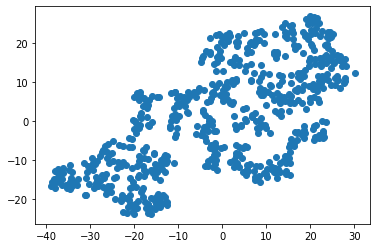

In [24]:
# Plot the transformed features
plt.scatter(X, y)
plt.show()

Result: There appear to be two to three clusters, although they are not completely distinct.

## Part 3: Perform a Cluster Analysis with K-means

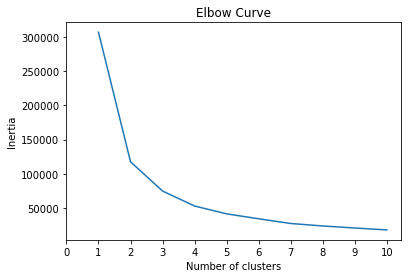

In [28]:
# Create an elbow plot to identify the best number of clusters

# Find the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(tsne_features)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

Result: The elbow of the plot appears to be at three clusters.